Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv
Original Dataset Shape: (962, 2)

Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


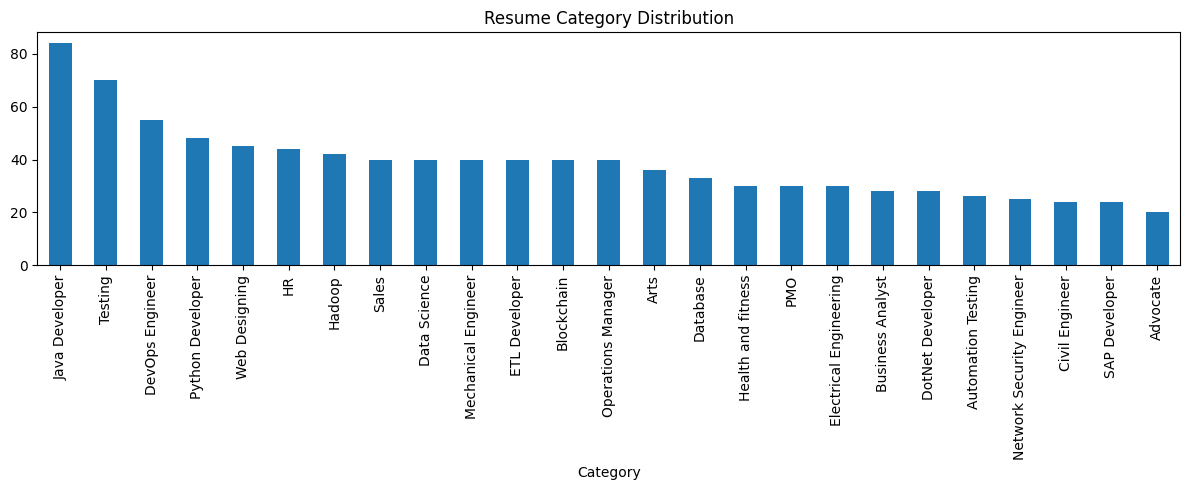

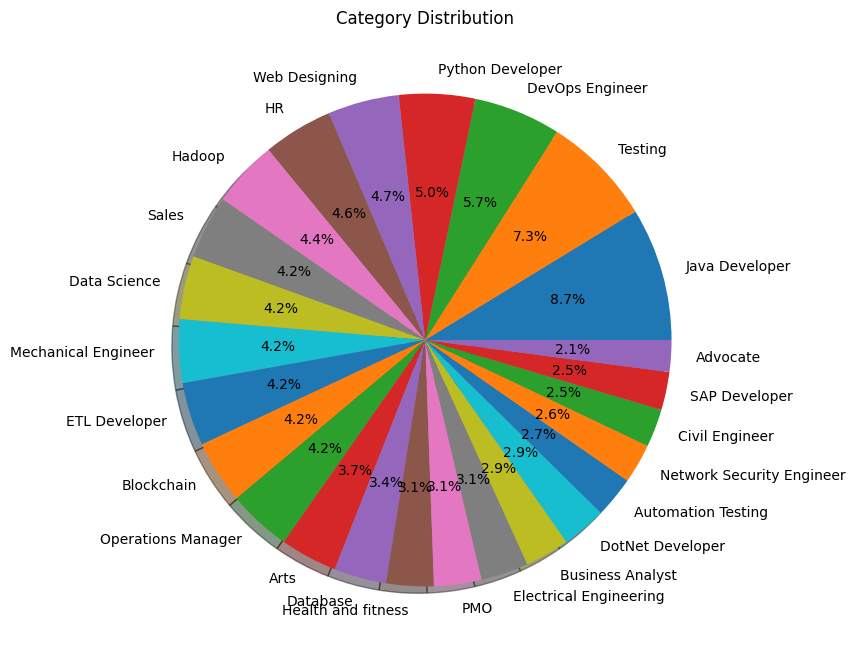

<ipython-input-4-3299298301>:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)



Balanced Category Distribution:
Category
SAP Developer                84
Operations Manager           84
Testing                      84
Blockchain                   84
HR                           84
Health and fitness           84
Electrical Engineering       84
Java Developer               84
Arts                         84
Data Science                 84
Web Designing                84
Hadoop                       84
Sales                        84
ETL Developer                84
Database                     84
Mechanical Engineer          84
PMO                          84
Advocate                     84
Civil Engineer               84
DotNet Developer             84
Python Developer             84
DevOps Engineer              84
Network Security Engineer    84
Business Analyst             84
Automation Testing           84
Name: count, dtype: int64

--- SVC Model Evaluation ---
Accuracy: 0.9952
Classification Report:
               precision    recall  f1-score   support

      

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('UpdatedResumeDataSet.csv')


print("Original Dataset Shape:", df.shape)
print("\nCategory Distribution:")
print(df['Category'].value_counts())


plt.figure(figsize=(12, 5))
df['Category'].value_counts().plot(kind='bar')
plt.title('Resume Category Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title("Category Distribution")
plt.ylabel("")
plt.show()


max_size = df['Category'].value_counts().max()
df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)

print("\nBalanced Category Distribution:")
print(df['Category'].value_counts())

def cleanResume(text):
    text = re.sub('http\S+\s', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+\s', ' ', text)
    text = re.sub('@\S+', ' ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text.strip()

df['Resume'] = df['Resume'].apply(cleanResume)


le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])


tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Resume'])
y = df['Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVC()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("\n--- SVC Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('clf.pkl', 'wb'))
pickle.dump(le, open('encoder.pkl', 'wb'))


def pred(input_resume):
    cleaned = cleanResume(input_resume)
    vec = tfidf.transform([cleaned])
    pred_label = model.predict(vec)
    return le.inverse_transform(pred_label)[0]

